In [1]:
# change the cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
pd.options.display.max_rows=None
pd.options.display.max_columns=None

# Importing Basic Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import matplotlib as mpl
mpl.style.use('ggplot')

# Data Acquisition

In [5]:
df = pd.read_csv('OnlineNewsPopularity.csv')

In [6]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


# PCA

PCA is essentially a method that reduces the dimension of the feature space in such a way that new variables are orthogonal to each other (i.e. they are independent or not correlated). 

## Scaling

In [7]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [8]:
df2 = df.iloc[:,1:]

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()#instantiate
scaler.fit(df2)
df_scaled = scaler.transform(df2)
df_scaled

array([[ 1.75788035,  0.75744723, -0.69521045, ..., -1.81071884,
         0.13891975, -0.24102756],
       [ 1.75788035, -0.66165665, -0.61879381, ...,  0.83774863,
        -0.68965812, -0.23087859],
       [ 1.75788035, -0.66165665, -0.71219192, ...,  0.83774863,
        -0.68965812, -0.16301816],
       ...,
       [-1.61808342, -0.18862202, -0.2218518 , ..., -1.56994907,
        -0.08705603, -0.12861489],
       [-1.61808342, -2.08076053,  0.28759248, ...,  0.83774863,
        -0.68965812, -0.19742142],
       [-1.61808342, -0.18862202, -0.82681689, ..., -0.92789635,
         0.41511238, -0.18021979]])

## Apply PCA

In [9]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

.95 for the number of components parameter. It means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.

In [10]:
pca.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [11]:
df_scaled_pca = pca.transform(df_scaled)

In [12]:
# You can find out how many components PCA choose after fitting the model using pca.n_components_ . 
# In this case, 95% of the variance amounts to 330 principal components.
pca.n_components_

38

In [13]:
# variance by each component
pca.explained_variance_.round(2)

array([4.88, 4.13, 3.61, 3.  , 2.81, 2.59, 2.54, 2.29, 2.13, 2.08, 2.  ,
       1.89, 1.66, 1.39, 1.37, 1.24, 1.23, 1.21, 1.19, 1.17, 1.13, 1.09,
       1.05, 0.98, 0.91, 0.87, 0.81, 0.72, 0.68, 0.66, 0.61, 0.57, 0.56,
       0.53, 0.47, 0.46, 0.44, 0.41])

In [14]:
# explained variance ratio in terms of percentage of each PC component
exp_var = pca.explained_variance_ratio_
exp_var = np.round(exp_var*100, decimals=1)
exp_var

array([8.1, 6.9, 6. , 5. , 4.7, 4.3, 4.2, 3.8, 3.5, 3.5, 3.3, 3.1, 2.8,
       2.3, 2.3, 2.1, 2. , 2. , 2. , 2. , 1.9, 1.8, 1.7, 1.6, 1.5, 1.4,
       1.4, 1.2, 1.1, 1.1, 1. , 1. , 0.9, 0.9, 0.8, 0.8, 0.7, 0.7])

In [15]:
# Cumulative explained variance ratio

# if i want to capture 80 percent variance i use this
np.cumsum(exp_var)

array([ 8.1, 15. , 21. , 26. , 30.7, 35. , 39.2, 43. , 46.5, 50. , 53.3,
       56.4, 59.2, 61.5, 63.8, 65.9, 67.9, 69.9, 71.9, 73.9, 75.8, 77.6,
       79.3, 80.9, 82.4, 83.8, 85.2, 86.4, 87.5, 88.6, 89.6, 90.6, 91.5,
       92.4, 93.2, 94. , 94.7, 95.4])

In [16]:
labels = ['PC' + str(x) for x in range(1, len(exp_var)+1)]

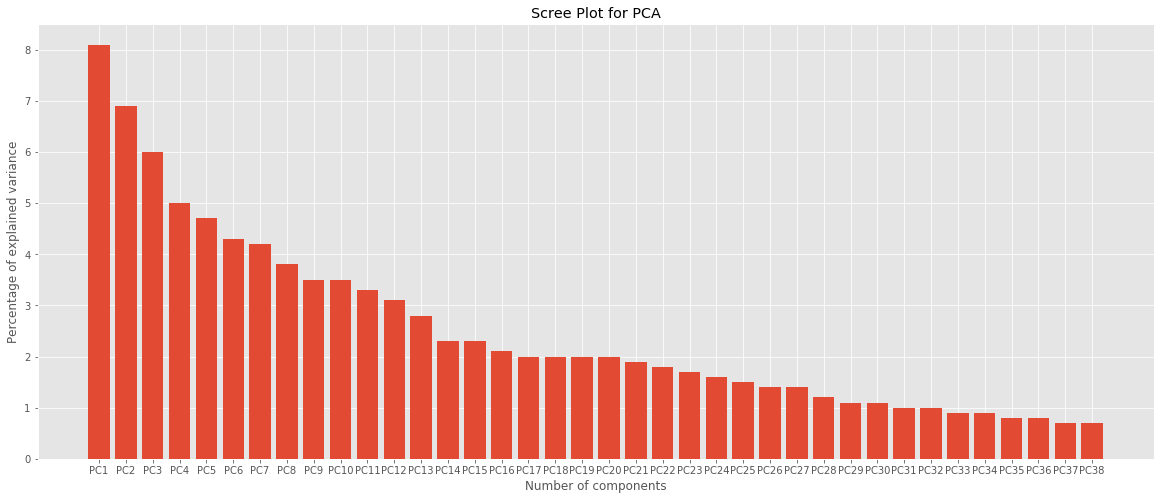

In [17]:
plt.figure(figsize=(20,8))
s = plt.bar(x = range(1, len(exp_var)+1), height = exp_var, tick_label = labels)
plt.xlabel("Number of components")
plt.ylabel("Percentage of explained variance")
plt.title("Scree Plot for PCA")
plt.show()

In [18]:
# pca
df_scaled_pca

array([[-1.34648179, -1.92109268, -1.96165114, ..., -0.05711869,
         0.18727658, -0.80930013],
       [ 0.21200733, -4.32405381, -1.08692318, ...,  0.86675434,
         0.01389532, -0.41399143],
       [-3.71738   , -3.53324826, -1.70058596, ..., -0.57026173,
        -0.69138673, -0.68377003],
       ...,
       [ 0.47004952,  2.63954765,  0.0234722 , ..., -0.89567761,
        -0.57005601,  1.0408702 ],
       [ 3.58087321,  0.20797442, -3.17201431, ..., -0.23334651,
         0.10592143,  1.21826544],
       [ 0.7852592 ,  0.62248651,  2.27154452, ..., -0.67127838,
        -0.45231596,  1.14452101]])

# Clustering

## Partitioning Clustering - KMeans

### Finding the right number of clusters

In [19]:
cluster_range=range(1,10)
cluster_wss=[]

from sklearn.cluster import KMeans
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(df_scaled_pca)
    cluster_wss.append(clusters.inertia_)    # store WSS of cluster

from collections import OrderedDict
clusters_df=pd.DataFrame(OrderedDict ({'num_clusters':cluster_range, 'cluster_wss': cluster_wss}))
clusters_df[0:9]

,num_clusters,cluster_wss
0,1,2.273929e+06
1,2,2.156562e+06
2,3,2.034362e+06
3,4,1.937315e+06
4,5,1.833454e+06
5,6,1.742552e+06
6,7,1.676816e+06
7,8,1.629836e+06
8,9,1.589509e+06


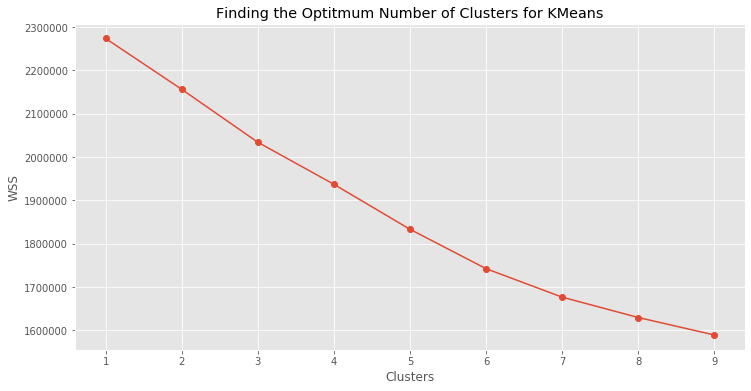

In [20]:
plt.figure(figsize=(12,6))
plt.xlabel('Clusters')
plt.ylabel('WSS')
plt.title('Finding the Optitmum Number of Clusters for KMeans')
plt.xticks(np.arange(min(clusters_df.num_clusters),max(clusters_df.num_clusters)+1, 1.0))  # on x-axis, tick marks after interval of 1
plt.plot(clusters_df.num_clusters, clusters_df.cluster_wss, marker="o")
plt.show()

### Building Cluster model

In [21]:
# kcluster=KMeans(n_clusters=5, random_state=0)
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12, random_state=0)
k_means.fit(df_scaled_pca)
labels = k_means.labels_
print(labels)

[0 2 3 ... 0 1 0]


### Adding CLuster Labels o the dataset

In [22]:
df2["Clus_km"] = labels
df2.head(5)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Clus_km
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,2
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,3
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,3


## Cluster Profiling

In [23]:
# df2[df2['Clus_km']==0]
# cluster 0 = lda 3 and lda 1
# cluster 1 = lda 2
# cluster 2 = lda 0
# cluster 3 = lda 4
# cluster 4 = lda in no category

# Multi-Class Classification

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import shapiro, mannwhitneyu

## Splitting the data

In [26]:
df2.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Clus_km
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,2
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,3
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,3


In [27]:
y = df2['Clus_km']
X = df2.drop(['Clus_km'], axis=1)

## Checking for class Imbalance

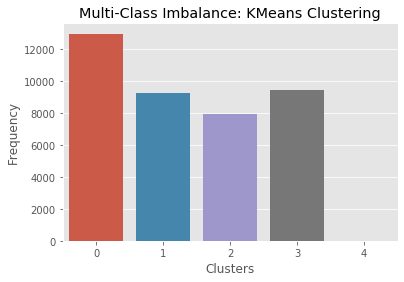

In [28]:
sns.countplot(data=df2, x='Clus_km')
plt.ylabel('Frequency')
plt.xlabel('Clusters')
plt.title('Multi-Class Imbalance: KMeans Clustering')
plt.show()

In [29]:
df2['Clus_km'].value_counts(normalize=True, ascending=False)*100

0    32.736354
3    23.872465
1    23.373020
2    20.015639
4     0.002522
Name: Clus_km, dtype: float64

In [30]:
# We see that class 4, is much lesser than the rest of the classes.

## Modelling

### Train Test Split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [32]:
print('Training X Shape:', X_train.shape)
print('Training y Shape:', y_train.shape)
print('Testing X Shape:', X_test.shape)
print('Testing y Shape:', y_test.shape)

Training X Shape: (27750, 60)
Training y Shape: (27750,)
Testing X Shape: (11894, 60)
Testing y Shape: (11894,)


### Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(dt.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 0,
 'splitter': 'best'}


#### Random Search Cross Validation

In [34]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

criterion = ['entropy','gini']
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2','int','float',None]

# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
max_depth = range(1,30)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = range(2,50)



# Create the random grid
random_grid = {'criterion':criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }

pprint(random_grid)

{'criterion': ['entropy', 'gini'],
 'max_depth': range(1, 30),
 'max_features': ['auto', 'sqrt', 'log2', 'int', 'float', None],
 'min_samples_leaf': range(2, 50),
 'min_samples_split': [2, 5, 10]}


In [35]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
dt = DecisionTreeClassifier(random_state = 0)
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
dt_random = RandomizedSearchCV(estimator=dt, param_distributions=random_grid,
                              n_iter = 100, scoring='f1_weighted', 
                              cv = 5, verbose=2, random_state=0, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
dt_random.fit(X_train, y_train);

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   51.4s finished


In [36]:
dt_random.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 14,
 'max_features': None,
 'max_depth': 11,
 'criterion': 'entropy'}

In [37]:
# cv results
cv_results_dt = pd.DataFrame(dt_random.cv_results_)
cv_results_dt.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.147405,0.003753,0.009375,0.000798,10,48,auto,4,entropy,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.689178,0.697679,0.750246,0.747645,0.698139,0.716577,0.026633,64,0.703926,0.700244,0.750094,0.755020,0.696670,0.721191,0.025760
1,0.157778,0.011792,0.012167,0.002475,5,28,log2,22,gini,"{'min_samples_split': 5, 'min_samples_leaf': 2...",0.877002,0.885118,0.890100,0.849807,0.889298,0.878265,0.014968,55,0.888413,0.898651,0.894928,0.878166,0.904950,0.893022,0.009160
2,0.196074,0.014433,0.013165,0.004010,5,46,sqrt,21,gini,"{'min_samples_split': 5, 'min_samples_leaf': 4...",0.906670,0.904305,0.908456,0.891217,0.913095,0.904749,0.007354,30,0.915065,0.909647,0.914638,0.906394,0.921026,0.913354,0.005012
3,0.211035,0.014653,0.010771,0.000746,2,35,auto,25,gini,"{'min_samples_split': 2, 'min_samples_leaf': 3...",0.901465,0.907892,0.882879,0.920371,0.910259,0.904573,0.012435,32,0.908879,0.920547,0.889291,0.928220,0.917094,0.912806,0.013299
4,0.043083,0.002036,0.000000,0.000000,2,27,int,25,entropy,"{'min_samples_split': 2, 'min_samples_leaf': 2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", dt_random.best_score_)
dt_random_best = dt_random.best_estimator_
print(dt_random.best_estimator_)

best accuracy 0.950696100775447
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=11, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=14, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


#### Running the model with best parameters obtained from Random Search CV

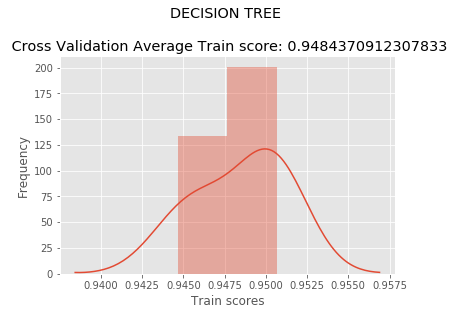

In [39]:
# K-fold cross val
kfold = KFold(shuffle=True, n_splits=5, random_state=0)
cv_results_dt = cross_val_score(dt_random_best, X_train, y_train, cv=kfold, scoring='f1_weighted')
sns.distplot(cv_results_dt)
plt.xlabel('Train scores')
plt.ylabel('Frequency')
plt.title('DECISION TREE \n\n Cross Validation Average Train score: {}'.format(np.mean(cv_results_dt)))
plt.show()

#### Evaluation Metrics

##### Plotting Cross Val score results

In [40]:
from sklearn.model_selection import cross_val_predict

y_dt_pred_train = cross_val_predict(dt_random_best, X_train, y_train, cv=5)
y_dt_pred_test = cross_val_predict(dt_random_best, X_test, y_test, cv=5)

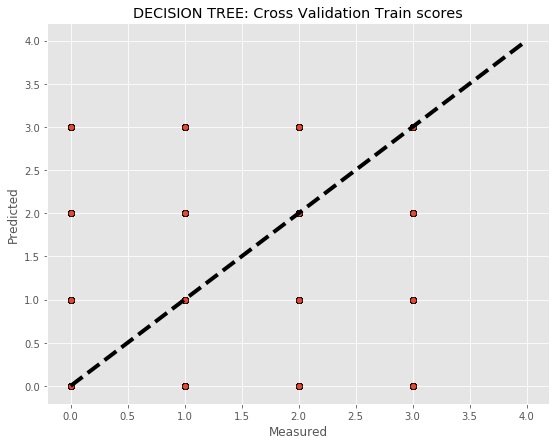

In [41]:
# Random Forest Bagging Cross Validation Train scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_train, y_dt_pred_train, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('DECISION TREE: Cross Validation Train scores')
plt.show()

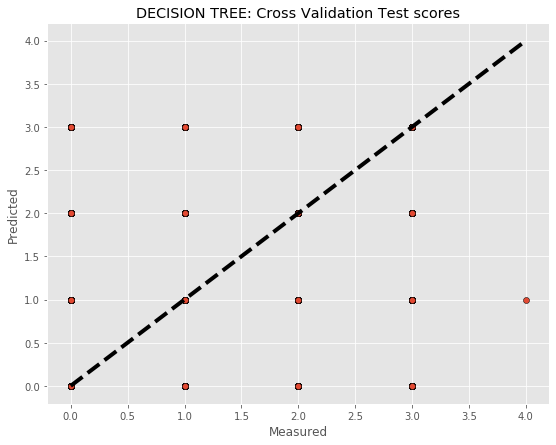

In [42]:
# Random Forest Bagging Cross Validation Test scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_test, y_dt_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('DECISION TREE: Cross Validation Test scores')
plt.show()

##### Classification Report

In [43]:
# classification Report for Train
from sklearn.metrics import classification_report,confusion_matrix
# y_dt_pred_train = dt_random_best.predict(X_train)
print(classification_report(y_train, y_dt_pred_train))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      9099
           1       0.95      0.95      0.95      6524
           2       0.95      0.96      0.95      5558
           3       0.96      0.94      0.95      6569

    accuracy                           0.95     27750
   macro avg       0.95      0.95      0.95     27750
weighted avg       0.95      0.95      0.95     27750



In [44]:
# classification Report for Test
from sklearn.metrics import classification_report,confusion_matrix
# y_dt_pred_test = dt_random_best.predict(X_test)
print(classification_report(y_test, y_dt_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      3879
           1       0.95      0.94      0.95      2742
           2       0.93      0.95      0.94      2377
           3       0.94      0.92      0.93      2895
           4       0.00      0.00      0.00         1

    accuracy                           0.94     11894
   macro avg       0.75      0.75      0.75     11894
weighted avg       0.94      0.94      0.94     11894



##### Confusion Matrix

In [45]:
# confusion matrix for Train
print(confusion_matrix(y_train,y_dt_pred_train))

[[8663  154  146  136]
 [ 154 6220   56   94]
 [ 130   56 5325   47]
 [ 213  114   68 6174]]


In [46]:
# confusion matrix for Test
print(confusion_matrix(y_test,y_dt_pred_test))

[[3642   70   79   88    0]
 [  61 2582   34   65    0]
 [  82   25 2249   21    0]
 [ 122   44   54 2675    0]
 [   0    1    0    0    0]]


##### Cohen Kappa score

In [47]:
# Cohen's Kappa coefficient for Train
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_train, y_dt_pred_train)

0.9334640816767745

In [48]:
# Cohen's Kappa coefficient for Test
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_dt_pred_test)

0.9153811801020912

### Random Forest

In [49]:
rf = RandomForestClassifier(random_state=0)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


#### Random Search Cross Validation

In [50]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
n_estimators = range(1,50)

# splitting criterion
criterion = ['entropy','gini']

# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2','int','float',None]

# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
max_depth = range(1,50)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20]

# Minimum number of samples required at each leaf node
min_samples_leaf = range(1,50)

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'criterion':criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
              }

pprint(random_grid)

{'bootstrap': [True, False],
 'criterion': ['entropy', 'gini'],
 'max_depth': range(1, 50),
 'max_features': ['auto', 'sqrt', 'log2', 'int', 'float', None],
 'min_samples_leaf': range(1, 50),
 'min_samples_split': [2, 5, 10, 15, 20],
 'n_estimators': range(1, 50)}


In [51]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 0)
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 50, scoring='f1_weighted', 
                              cv = 5, verbose=2, random_state=0, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 170 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.8min finished


In [52]:
rf_random.best_params_

{'n_estimators': 32,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 40,
 'criterion': 'gini',
 'bootstrap': False}

In [53]:
# cv results
cv_results_rf = pd.DataFrame(rf_random.cv_results_)
cv_results_rf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.074400,0.006359,0.000000,0.00000,19,20,26,int,18,entropy,False,"{'n_estimators': 19, 'min_samples_split': 20, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16.318050,0.442408,0.033909,0.00309,7,15,30,None,32,gini,False,"{'n_estimators': 7, 'min_samples_split': 15, '...",0.944329,0.947761,0.950634,0.942847,0.947742,0.946663,0.002762,24,0.954694,0.954936,0.953004,0.953728,0.954005,0.954073,0.000692
2,0.098139,0.014693,0.000000,0.00000,49,15,32,int,21,entropy,True,"{'n_estimators': 49, 'min_samples_split': 15, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.060040,0.008330,0.000000,0.00000,11,5,26,float,31,entropy,True,"{'n_estimators': 11, 'min_samples_split': 5, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.061436,0.005225,0.000000,0.00000,9,20,31,int,23,gini,True,"{'n_estimators': 9, 'min_samples_split': 20, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", rf_random.best_score_)
rf_random_best = rf_random.best_estimator_
print(rf_random_best)

best accuracy 0.9629747549460383
RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=32,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


#### Running the model with best parameters obtained from Random Search CV

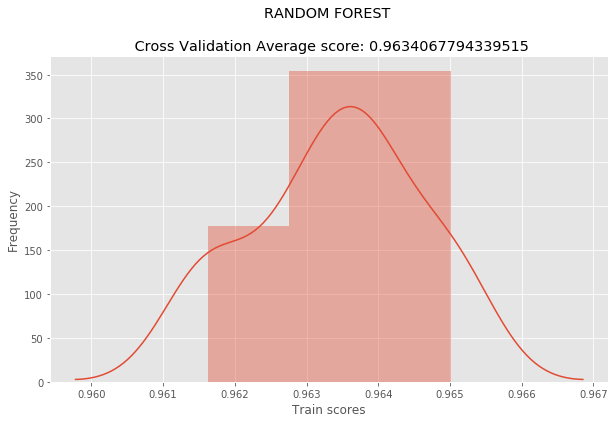

In [55]:
# K-fold cross val
kfold = KFold(shuffle=True, n_splits=5, random_state=0)
cv_results_rf = cross_val_score(rf_random_best, X_train, y_train, cv=kfold, scoring='f1_weighted')
plt.figure(figsize=(10,6))
plt.xlabel('Train scores')
plt.ylabel('Frequency')
sns.distplot(cv_results_rf)
plt.title('RANDOM FOREST \n\n Cross Validation Average score: {}'.format(np.mean(cv_results_rf)))
plt.show()

#### Evaluation Metrics

##### Plotting Cross Val score results

In [56]:
from sklearn.model_selection import cross_val_predict

y_rf_pred_train = cross_val_predict(rf_random_best, X_train, y_train, cv=5)
y_rf_pred_test = cross_val_predict(rf_random_best, X_test, y_test, cv=5)

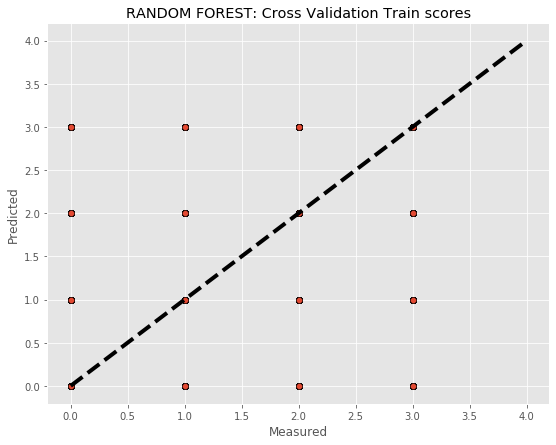

In [57]:
# Random Forest Bagging Cross Validation Train scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_train, y_rf_pred_train, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('RANDOM FOREST: Cross Validation Train scores')
plt.show()

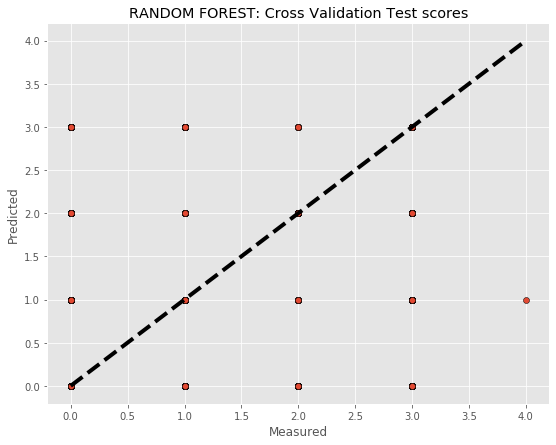

In [58]:
# Random Forest Bagging Cross Validation Test scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_test, y_rf_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('RANDOM FOREST: Cross Validation Test scores')
plt.show()

##### Classification Report

In [59]:
# classification Report for Train
from sklearn.metrics import classification_report,confusion_matrix
# y_rf_pred_train = rf_random_best.predict(X_train)
print(classification_report(y_train, y_rf_pred_train))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      9099
           1       0.97      0.96      0.97      6524
           2       0.96      0.97      0.97      5558
           3       0.97      0.95      0.96      6569

    accuracy                           0.96     27750
   macro avg       0.96      0.96      0.96     27750
weighted avg       0.96      0.96      0.96     27750



In [60]:
# classification Report for Test
from sklearn.metrics import classification_report,confusion_matrix
# y_rf_pred_test = rf_random_best.predict(X_test)
print(classification_report(y_test, y_rf_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3879
           1       0.97      0.96      0.96      2742
           2       0.96      0.97      0.97      2377
           3       0.97      0.95      0.96      2895
           4       0.00      0.00      0.00         1

    accuracy                           0.96     11894
   macro avg       0.77      0.77      0.77     11894
weighted avg       0.96      0.96      0.96     11894



##### Confusion Matrix

In [61]:
# confusion matrix for Train
print(confusion_matrix(y_train,y_rf_pred_train))

[[8821   88  104   86]
 [ 133 6275   53   63]
 [  93   27 5407   31]
 [ 197   91   61 6220]]


In [62]:
# confusion matrix for Test
print(confusion_matrix(y_test,y_rf_pred_test))

[[3733   42   49   55    0]
 [  55 2641   18   28    0]
 [  43   15 2309   10    0]
 [  84   35   30 2746    0]
 [   0    1    0    0    0]]


##### Cohen Kappa score

In [63]:
# Cohen's Kappa coefficient for Train
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_train, y_rf_pred_train)

0.950033220016798

In [64]:
# Cohen's Kappa coefficient for Test
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_rf_pred_test)

0.9472493827062526

### Decision Tree: Bagging

In [65]:
from sklearn.ensemble import BaggingClassifier

# taking the base model as a Decision Tree
bg_dt = BaggingClassifier(base_estimator=dt_random_best, n_estimators=50, random_state=0, oob_score=True)

# K-fold cross val
kfold = KFold(shuffle=True, n_splits=5, random_state=0)
cv_results_bg_dt = cross_val_score(bg_dt, X_train, y_train, cv=kfold, scoring='f1_weighted')

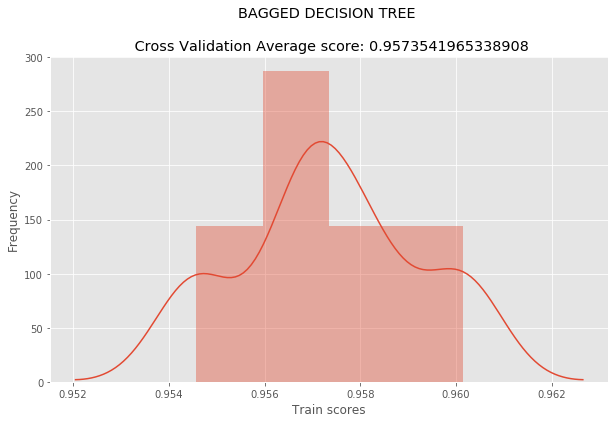

In [66]:
plt.figure(figsize=(10,6))
plt.xlabel('Train scores')
plt.ylabel('Frequency')
sns.distplot(cv_results_bg_dt)
plt.title('BAGGED DECISION TREE \n\n Cross Validation Average score: {}'.format(np.mean(cv_results_bg_dt)))
plt.show()

#### Evaluation Metrics

##### Plotting Cross Val score results

In [67]:
from sklearn.model_selection import cross_val_predict

y_bg_dt_pred_train = cross_val_predict(bg_dt, X_train, y_train, cv=5)
y_bg_dt_pred_test = cross_val_predict(bg_dt, X_test, y_test, cv=5)

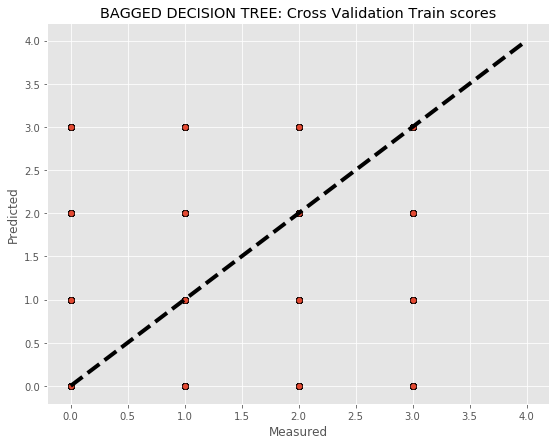

In [68]:
# Decision Tree Bagging Cross Validation Train scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_train, y_bg_dt_pred_train, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('BAGGED DECISION TREE: Cross Validation Train scores')
plt.show()

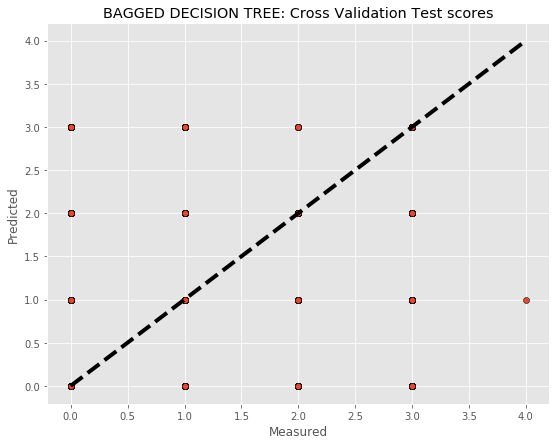

In [69]:
# Decision Tree Bagging Cross Validation Test scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_test, y_bg_dt_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('BAGGED DECISION TREE: Cross Validation Test scores')
plt.show()

##### Classification Report

In [70]:
# classification Report for Train
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train, y_bg_dt_pred_train))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      9099
           1       0.97      0.96      0.96      6524
           2       0.95      0.97      0.96      5558
           3       0.97      0.94      0.95      6569

    accuracy                           0.96     27750
   macro avg       0.96      0.96      0.96     27750
weighted avg       0.96      0.96      0.96     27750



In [71]:
# classification Report for Test
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_bg_dt_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3879
           1       0.96      0.95      0.96      2742
           2       0.94      0.97      0.95      2377
           3       0.96      0.94      0.95      2895
           4       0.00      0.00      0.00         1

    accuracy                           0.95     11894
   macro avg       0.76      0.76      0.76     11894
weighted avg       0.95      0.95      0.95     11894



##### Classification Matrix

In [72]:
# confusion matrix for Train
print(confusion_matrix(y_train,y_bg_dt_pred_train))

[[8734  106  144  115]
 [ 137 6235   77   75]
 [ 103   27 5406   22]
 [ 217   92   65 6195]]


In [73]:
# confusion matrix for Test
print(confusion_matrix(y_test,y_bg_dt_pred_test))

[[3688   56   73   62    0]
 [  55 2614   35   38    0]
 [  46   17 2306    8    0]
 [  96   33   40 2726    0]
 [   0    1    0    0    0]]


##### Cohen Kappa score

In [74]:
# Cohen's Kappa coefficient for Train
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_train, y_bg_dt_pred_train)

0.9426095017366931

In [75]:
# Cohen's Kappa coefficient for Test
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_bg_dt_pred_test)

0.9365041057543192

### Random Forest: Bagging

In [76]:
from sklearn.ensemble import BaggingClassifier

# taking the base model as a Decision Tree
bg_rf = BaggingClassifier(base_estimator=rf_random_best, n_estimators=50, random_state=0, oob_score=True)

# K-fold cross val
kfold = KFold(shuffle=True, n_splits=5, random_state=0)
cv_results_bg_rf = cross_val_score(bg_rf, X_train, y_train, cv=kfold, scoring='f1_weighted')

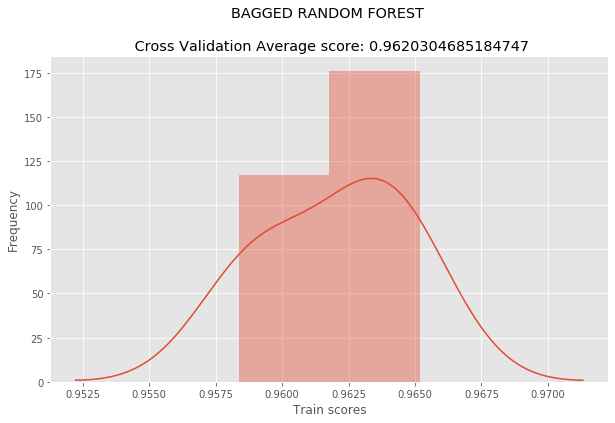

In [77]:
plt.figure(figsize=(10,6))
plt.xlabel('Train scores')
plt.ylabel('Frequency')
sns.distplot(cv_results_bg_rf)
plt.title('BAGGED RANDOM FOREST \n\n Cross Validation Average score: {}'.format(np.mean(cv_results_bg_rf)))
plt.show()

#### Evaluation Metrics

##### Plotting Cross Val score results

In [78]:
from sklearn.model_selection import cross_val_predict

y_bg_rf_pred_train = cross_val_predict(bg_rf, X_train, y_train, cv=5)
y_bg_rf_pred_test = cross_val_predict(bg_rf, X_test, y_test, cv=5)

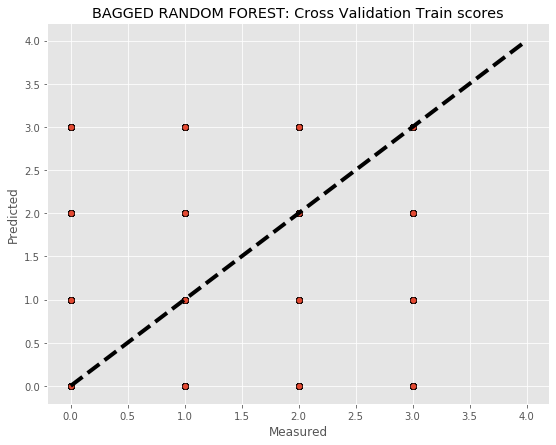

In [79]:
# Random Forest Bagging Cross Validation Train scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_train, y_bg_rf_pred_train, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('BAGGED RANDOM FOREST: Cross Validation Train scores')
plt.show()

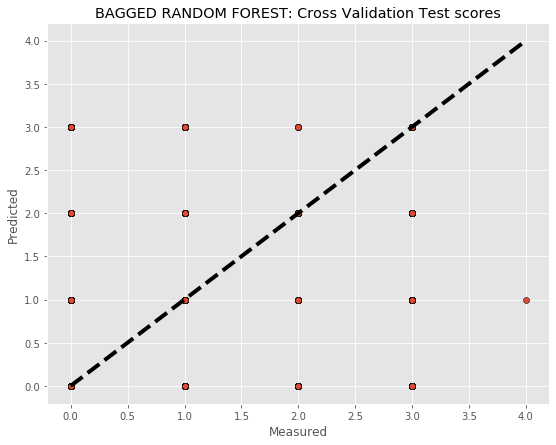

In [80]:
# Random Forest Bagging Cross Validation Test scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_test, y_bg_rf_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('BAGGED RANDOM FOREST: Cross Validation Test scores')
plt.show()

##### Classification Report

In [81]:
# classification Report for Train
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train, y_bg_rf_pred_train))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      9099
           1       0.97      0.96      0.96      6524
           2       0.96      0.97      0.97      5558
           3       0.97      0.94      0.96      6569

    accuracy                           0.96     27750
   macro avg       0.96      0.96      0.96     27750
weighted avg       0.96      0.96      0.96     27750



In [82]:
# classification Report for Test
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_bg_rf_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3879
           1       0.96      0.96      0.96      2742
           2       0.96      0.97      0.96      2377
           3       0.97      0.94      0.96      2895
           4       0.00      0.00      0.00         1

    accuracy                           0.96     11894
   macro avg       0.77      0.77      0.77     11894
weighted avg       0.96      0.96      0.96     11894



##### Classification Matrix

In [83]:
# confusion matrix for Train
print(confusion_matrix(y_train,y_bg_rf_pred_train))

[[8824   90   99   86]
 [ 137 6272   58   57]
 [ 112   22 5399   25]
 [ 210  107   62 6190]]


In [84]:
# confusion matrix for Test
print(confusion_matrix(y_test,y_bg_rf_pred_test))

[[3745   41   50   43    0]
 [  60 2634   20   28    0]
 [  51   14 2306    6    0]
 [  87   45   31 2732    0]
 [   0    1    0    0    0]]


##### Cohen Kappa score

In [85]:
# Cohen's Kappa coefficient for Train
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_train, y_bg_rf_pred_train)

0.9481748328683406

In [86]:
# Cohen's Kappa coefficient for Test
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_bg_rf_pred_test)

0.945874199427158

### Decison Tree: Boosting

#### Ada Boost:

In [87]:
from sklearn.ensemble import AdaBoostClassifier
ab_dt = AdaBoostClassifier(base_estimator=dt_random_best, n_estimators= 50, random_state=0)

# K-fold cross val
kfold = KFold(shuffle=True, n_splits=5, random_state=0)
cv_results_ab_dt = cross_val_score(ab_dt, X_train, y_train, cv=kfold, scoring='f1_weighted')


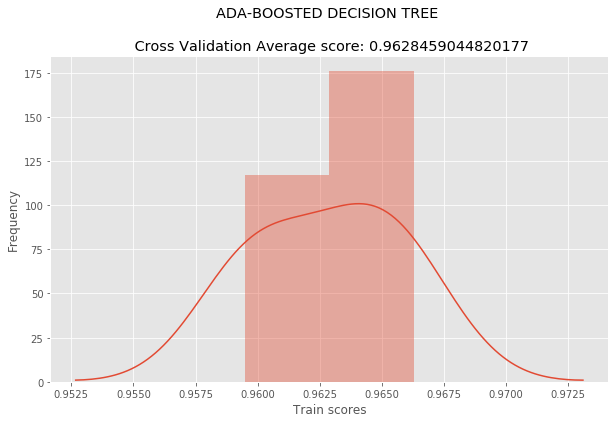

In [88]:
plt.figure(figsize=(10,6))
plt.xlabel('Train scores')
plt.ylabel('Frequency')
sns.distplot(cv_results_ab_dt)
plt.title('ADA-BOOSTED DECISION TREE \n\n Cross Validation Average score: {}'.format(np.mean(cv_results_ab_dt)))
plt.show()

##### Evaluation Metrics

##### Plotting Cross Val score results

In [89]:
from sklearn.model_selection import cross_val_predict

y_ab_dt_pred_train = cross_val_predict(ab_dt, X_train, y_train, cv=5)
y_ab_dt_pred_test = cross_val_predict(ab_dt, X_test, y_test, cv=5)

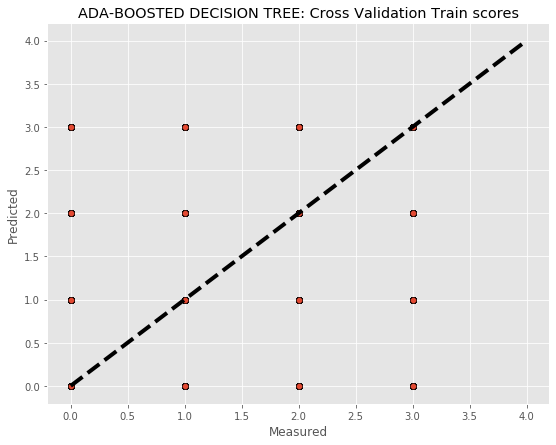

In [90]:
# Random Forest Bagging Cross Validation Train scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_train, y_ab_dt_pred_train, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('ADA-BOOSTED DECISION TREE: Cross Validation Train scores')
plt.show()

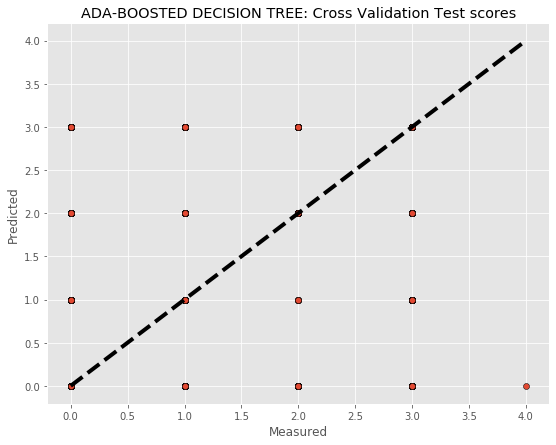

In [91]:
# Random Forest Bagging Cross Validation Test scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_test, y_ab_dt_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('ADA-BOOSTED DECISION TREE: Cross Validation Test scores')
plt.show()

##### Classification Report

In [92]:
# classification Report for Train
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train, y_ab_dt_pred_train))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      9099
           1       0.97      0.97      0.97      6524
           2       0.96      0.97      0.96      5558
           3       0.96      0.95      0.96      6569

    accuracy                           0.96     27750
   macro avg       0.96      0.96      0.96     27750
weighted avg       0.96      0.96      0.96     27750



In [93]:
# classification Report for Test
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_ab_dt_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3879
           1       0.97      0.96      0.97      2742
           2       0.96      0.96      0.96      2377
           3       0.96      0.95      0.96      2895
           4       0.00      0.00      0.00         1

    accuracy                           0.96     11894
   macro avg       0.77      0.77      0.77     11894
weighted avg       0.96      0.96      0.96     11894



##### Classification Matrix

In [94]:
# confusion matrix for Train
print(confusion_matrix(y_train,y_ab_dt_pred_train))

[[8797   70  101  131]
 [ 119 6297   42   66]
 [ 110   26 5375   47]
 [ 182   66   71 6250]]


In [95]:
# confusion matrix for Test
print(confusion_matrix(y_test,y_ab_dt_pred_test))

[[3736   34   50   59    0]
 [  55 2628   25   34    0]
 [  55    9 2293   20    0]
 [  88   32   23 2752    0]
 [   1    0    0    0    0]]


##### Cohen Kappa score

In [96]:
# Cohen's Kappa coefficient for Train
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_train, y_ab_dt_pred_train)

0.949843329180049

In [97]:
# Cohen's Kappa coefficient for Test
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_ab_dt_pred_test)

0.9449636400760076

#### Gradient Boost

In [98]:
from sklearn.ensemble import GradientBoostingClassifier
gb_dt = GradientBoostingClassifier(n_estimators= 50, random_state=0)

# K-fold cross val
kfold = KFold(shuffle=True, n_splits=5, random_state=0)
cv_results_gb_dt = cross_val_score(gb_dt, X_train, y_train, cv=kfold, scoring='f1_weighted')


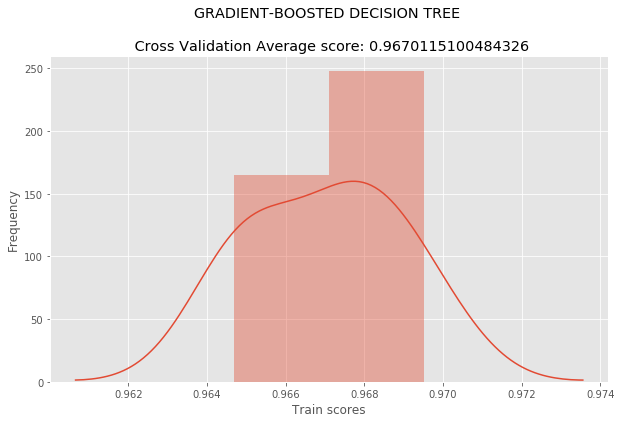

In [99]:
plt.figure(figsize=(10,6))
plt.xlabel('Train scores')
plt.ylabel('Frequency')
sns.distplot(cv_results_gb_dt)
plt.title('GRADIENT-BOOSTED DECISION TREE \n\n Cross Validation Average score: {}'.format(np.mean(cv_results_gb_dt)))
plt.show()

##### Evaluation Metrics

##### Plotting Cross Val score results

In [100]:
from sklearn.model_selection import cross_val_predict

y_gb_dt_pred_train = cross_val_predict(gb_dt, X_train, y_train, cv=5)
y_gb_dt_pred_test = cross_val_predict(gb_dt, X_test, y_test, cv=5)

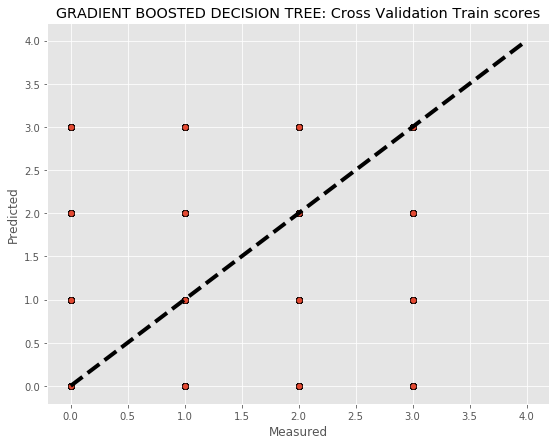

In [101]:
# Random Forest Bagging Cross Validation Train scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_train, y_gb_dt_pred_train, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('GRADIENT BOOSTED DECISION TREE: Cross Validation Train scores')
plt.show()

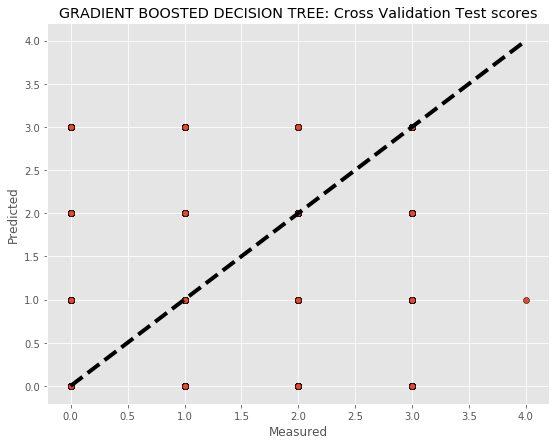

In [102]:
# Random Forest Bagging Cross Validation Test scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_test, y_gb_dt_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('GRADIENT BOOSTED DECISION TREE: Cross Validation Test scores')
plt.show()

##### Classification Report

In [103]:
# classification Report for Train
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train, y_gb_dt_pred_train))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      9099
           1       0.97      0.97      0.97      6524
           2       0.97      0.98      0.97      5558
           3       0.98      0.95      0.96      6569

    accuracy                           0.97     27750
   macro avg       0.97      0.97      0.97     27750
weighted avg       0.97      0.97      0.97     27750



In [104]:
# classification Report for Test
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_gb_dt_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      3879
           1       0.97      0.97      0.97      2742
           2       0.96      0.97      0.97      2377
           3       0.97      0.95      0.96      2895
           4       0.00      0.00      0.00         1

    accuracy                           0.97     11894
   macro avg       0.77      0.77      0.77     11894
weighted avg       0.97      0.97      0.97     11894



##### Classification Matrix

In [105]:
# confusion matrix for Train
print(confusion_matrix(y_train,y_gb_dt_pred_train))

[[8825   90  105   79]
 [  97 6332   36   59]
 [  71   29 5438   20]
 [ 180   81   51 6257]]


In [106]:
# confusion matrix for Test
print(confusion_matrix(y_test,y_gb_dt_pred_test))

[[3751   42   52   34    0]
 [  47 2654   16   25    0]
 [  36   14 2315   12    0]
 [  82   25   28 2760    0]
 [   0    1    0    0    0]]


##### Cohen Kappa score

In [107]:
# Cohen's Kappa coefficient for Train
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_train, y_gb_dt_pred_train)

0.9563237939161715

In [108]:
# Cohen's Kappa coefficient for Test
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_gb_dt_pred_test)

0.953035790729514

#### XG Boost

In [109]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

xgb_dt = xgb.XGBClassifier(random_state = 0)
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }

xgb_random = RandomizedSearchCV(xgb_dt,
                    parameters, n_jobs=-1,
                    scoring="f1_weighted",
                    cv=5, n_iter = 15,verbose=2, random_state=0,
                    return_train_score=True)

xgb_random.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 17.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                           validate_parameters=False,
                                           verbosity=None),
                   iid='deprecated', n_iter=15, n_

In [110]:
xgb_random.best_params_

{'min_child_weight': 7,
 'max_depth': 3,
 'gamma': 0.1,
 'eta': 0.3,
 'colsample_bytree': 0.3}

In [111]:
# cv results
cv_results_xgb = pd.DataFrame(xgb_random.cv_results_)
cv_results_xgb.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_child_weight,param_max_depth,param_gamma,param_eta,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,115.655808,3.230430,0.546860,0.006433,1,6,0,0.3,0.5,"{'min_child_weight': 1, 'max_depth': 6, 'gamma...",0.978189,0.975493,0.980713,0.978384,0.975305,0.977617,0.002018,11,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,109.414308,1.585924,0.508001,0.010119,7,6,0.1,0.25,0.5,"{'min_child_weight': 7, 'max_depth': 6, 'gamma...",0.980536,0.978195,0.983602,0.979289,0.977652,0.979855,0.002118,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,128.684281,3.133073,0.630663,0.087390,3,10,0.1,0.25,0.4,"{'min_child_weight': 3, 'max_depth': 10, 'gamm...",0.977834,0.974413,0.980356,0.979103,0.977827,0.977907,0.001982,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,88.656024,2.349139,0.315509,0.032435,1,3,0.2,0.15,0.7,"{'min_child_weight': 1, 'max_depth': 3, 'gamma...",0.977651,0.976038,0.979996,0.977653,0.975661,0.977400,0.001533,12,0.991306,0.991352,0.990316,0.991622,0.991216,0.991162,0.000444
4,52.867687,1.332866,0.322401,0.031557,7,3,0.1,0.3,0.3,"{'min_child_weight': 7, 'max_depth': 3, 'gamma...",0.982880,0.978739,0.983600,0.980901,0.978187,0.980862,0.002156,1,0.997433,0.997793,0.997297,0.997568,0.997613,0.997541,0.000168


In [112]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", xgb_random.best_score_)
xgb_random_best = xgb_random.best_estimator_
print(xgb_random_best)

best accuracy 0.9808615307241684
XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, eta=0.3, gamma=0.1,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)


In [113]:
# K-fold cross val
kfold = KFold(shuffle=True, n_splits=5, random_state=0)
cv_results_xgb = cross_val_score(xgb_random_best, X_train, y_train, cv=kfold, scoring='f1_weighted')

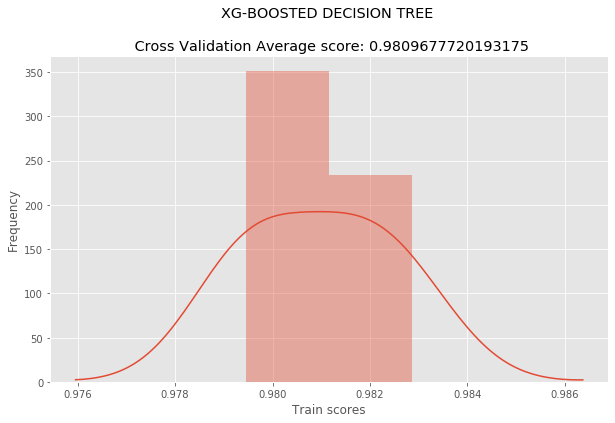

In [114]:
plt.figure(figsize=(10,6))
plt.xlabel('Train scores')
plt.ylabel('Frequency')
sns.distplot(cv_results_xgb)
plt.title('XG-BOOSTED DECISION TREE \n\n Cross Validation Average score: {}'.format(np.mean(cv_results_xgb)))
plt.show()

##### Evaluation Metrics

##### Plotting Cross Val score results

In [115]:
from sklearn.model_selection import cross_val_predict

y_xgb_dt_pred_train = cross_val_predict(xgb_random_best, X_train, y_train, cv=5)
y_xgb_dt_pred_test = cross_val_predict(xgb_random_best, X_test, y_test, cv=5)

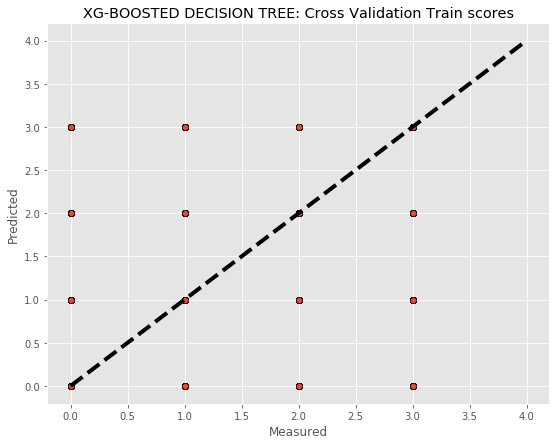

In [116]:
# Random Forest xg-boosted Cross Validation Train scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_train, y_xgb_dt_pred_train, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('XG-BOOSTED DECISION TREE: Cross Validation Train scores')
plt.show()

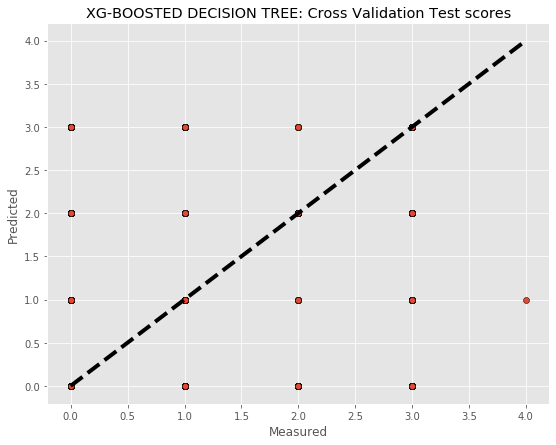

In [117]:
# Random Forest xg-boosted Cross Validation Test scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_test, y_xgb_dt_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('XG-BOOSTED DECISION TREE: Cross Validation Test scores')
plt.show()

##### Classification Report

In [118]:
# classification Report for Train
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train, y_xgb_dt_pred_train))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      9099
           1       0.98      0.98      0.98      6524
           2       0.98      0.98      0.98      5558
           3       0.98      0.97      0.98      6569

    accuracy                           0.98     27750
   macro avg       0.98      0.98      0.98     27750
weighted avg       0.98      0.98      0.98     27750



In [119]:
# classification Report for Test
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_xgb_dt_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3879
           1       0.98      0.97      0.98      2742
           2       0.97      0.98      0.98      2377
           3       0.98      0.97      0.97      2895
           4       0.00      0.00      0.00         1

    accuracy                           0.98     11894
   macro avg       0.78      0.78      0.78     11894
weighted avg       0.98      0.98      0.98     11894



##### Classification Matrix

In [120]:
# confusion matrix for Train
print(confusion_matrix(y_train,y_xgb_dt_pred_train))

[[8938   43   53   65]
 [  55 6418   25   26]
 [  47   23 5468   20]
 [  90   52   32 6395]]


In [121]:
# confusion matrix for Test
print(confusion_matrix(y_test,y_xgb_dt_pred_test))

[[3790   22   36   31    0]
 [  36 2670   15   21    0]
 [  27    9 2333    8    0]
 [  47   18   23 2807    0]
 [   0    1    0    0    0]]


##### Cohen Kappa score

In [122]:
# Cohen's Kappa coefficient for Train
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_train, y_xgb_dt_pred_train)

0.9741761991531942

In [123]:
# Cohen's Kappa coefficient for Test
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_xgb_dt_pred_test)

0.9666521748932372

### Random Forest: Boosting

#### Ada Boost

In [124]:
from sklearn.ensemble import AdaBoostClassifier
ab_rf = AdaBoostClassifier(base_estimator=rf_random_best, n_estimators= 50, random_state=0)

# K-fold cross val
kfold = KFold(shuffle=True, n_splits=5, random_state=0)
cv_results_ab_rf = cross_val_score(ab_rf, X, y, cv=kfold, scoring='f1_weighted')


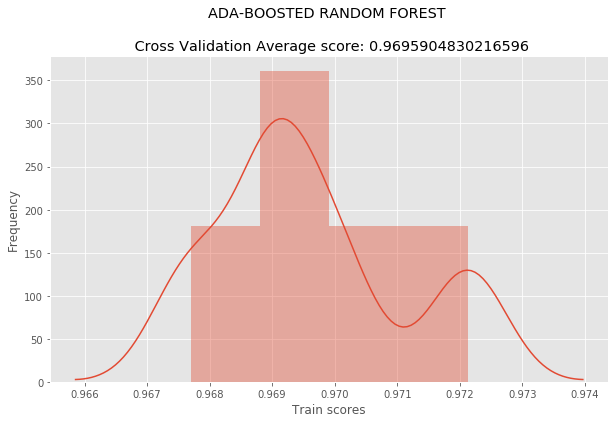

In [125]:
plt.figure(figsize=(10,6))
plt.xlabel('Train scores')
plt.ylabel('Frequency')
sns.distplot(cv_results_ab_rf)
plt.title('ADA-BOOSTED RANDOM FOREST \n\n Cross Validation Average score: {}'.format(np.mean(cv_results_ab_rf)))
plt.show()

##### Evaluation Metrics

##### Plotting Cross Val score results

In [126]:
from sklearn.model_selection import cross_val_predict

y_ab_rf_pred_train = cross_val_predict(ab_rf, X_train, y_train, cv=5)
y_ab_rf_pred_test = cross_val_predict(ab_rf, X_test, y_test, cv=5)

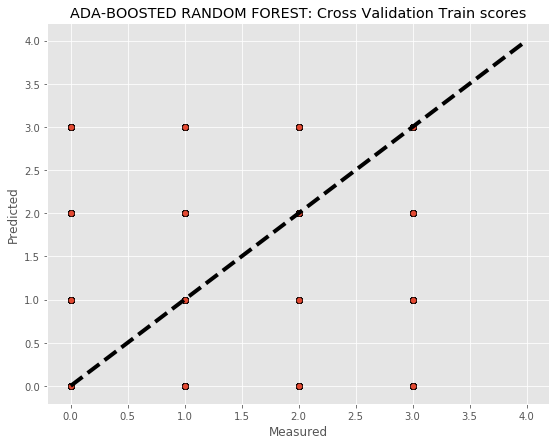

In [127]:
# Random Forest Ada-Boosting Cross Validation Train scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_train, y_ab_rf_pred_train, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('ADA-BOOSTED RANDOM FOREST: Cross Validation Train scores')
plt.show()

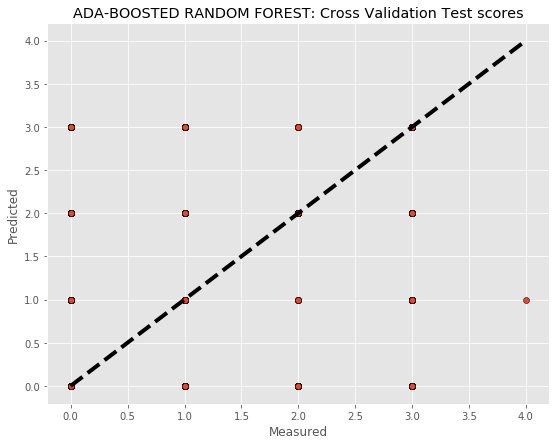

In [128]:
# Random Forest Ada-Boosting Cross Validation Test scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_test, y_ab_rf_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('ADA-BOOSTED RANDOM FOREST: Cross Validation Test scores')
plt.show()

##### Classification Report

In [129]:
# classification Report for Train
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train, y_ab_rf_pred_train))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      9099
           1       0.98      0.96      0.97      6524
           2       0.97      0.98      0.97      5558
           3       0.97      0.96      0.97      6569

    accuracy                           0.97     27750
   macro avg       0.97      0.97      0.97     27750
weighted avg       0.97      0.97      0.97     27750



In [130]:
# classification Report for Test
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_ab_rf_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3879
           1       0.97      0.96      0.97      2742
           2       0.97      0.97      0.97      2377
           3       0.97      0.96      0.97      2895
           4       0.00      0.00      0.00         1

    accuracy                           0.97     11894
   macro avg       0.77      0.77      0.77     11894
weighted avg       0.97      0.97      0.97     11894



##### Classification Matrix

In [131]:
# confusion matrix for Train
print(confusion_matrix(y_train,y_ab_rf_pred_train))

[[8857   62   87   93]
 [ 136 6293   41   54]
 [  71   20 5445   22]
 [ 160   64   60 6285]]


In [132]:
# confusion matrix for Test
print(confusion_matrix(y_test,y_ab_rf_pred_test))

[[3766   31   45   37    0]
 [  60 2639   16   27    0]
 [  44    7 2317    9    0]
 [  74   33   20 2768    0]
 [   0    1    0    0    0]]


##### Cohen Kappa score

In [133]:
# Cohen's Kappa coefficient for Train
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_train, y_ab_rf_pred_train)

0.957675978504204

In [134]:
# Cohen's Kappa coefficient for Test
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_ab_rf_pred_test)

0.9541535273151055